# MNIST Fashion Prediction Using Sequential and API TF 

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


In [4]:
# load the data directly into x and y train/test

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [6]:
print('Shape of training data', X_train.shape)
print('Shape of testing data', X_test.shape)
print('Classes',np.unique(y_test), ' | Number of classes:',len(np.unique(y_test)))

Shape of training data (60000, 28, 28)
Shape of testing data (10000, 28, 28)
Classes [0 1 2 3 4 5 6 7 8 9]  | Number of classes: 10


In [8]:
label_data = pd.DataFrame(y_train,columns=['Label'])
label_data.head()

,Label
0,9
1,0
2,0
3,3
4,0


In [9]:
clothing_name_list = {
        0: 'T-shirt/top'
        , 1: 'Trouser'
        , 2: 'Pullover'
        , 3: 'Dress'
        , 4: 'Coat'
        , 5: 'Sandal'
        , 6: 'Shirt'
        , 7: 'Sneaker'
        , 8: 'Bag'
        , 9: 'Ankle boot'

}

label_data['Clothing_Name'] = label_data['Label'].map(clothing_name_list)
label_data

,Label,Clothing_Name
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
...,...,...
59995,5,Sandal
59996,1,Trouser
59997,3,Dress
59998,0,T-shirt/top


In [22]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

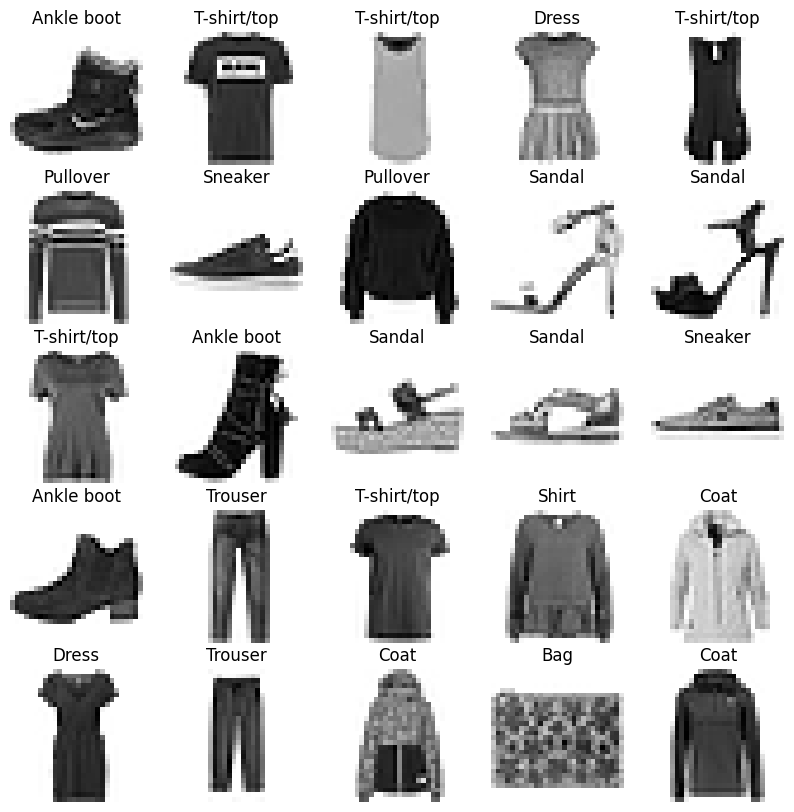

In [21]:
# let's build a 5 x 5 grid to show the images of a sample of 25 clothing items
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(-X_train[i], cmap='gray') # use - sign to invert the image
    plt.axis('off')
    plt.title(label_data['Clothing_Name'][i])


In [23]:
label_data['Clothing_Name'].value_counts()

Clothing_Name
Ankle boot     6000
T-shirt/top    6000
Dress          6000
Pullover       6000
Sneaker        6000
Sandal         6000
Trouser        6000
Shirt          6000
Coat           6000
Bag            6000
Name: count, dtype: int64

In [29]:
# building the model - style 1
model = models.Sequential([
    #flattened input layer
    layers.Flatten(input_shape=(28,28)),

    #the dense (hidden layer)
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),

    #output layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
# building the model - style 2
model = models.Sequential() # defining the model with no parameters
#use add function to add layers

#flattened input layer
model.add(layers.Flatten(input_shape=(28,28)))

#the dense (hidden layer)
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))

#output layer
model.add(layers.Dense(10, activation='softmax'))

In [31]:
# compiling the model - style 1
model.compile(optimizer='adam', #you can start with adam, then use others if the loss function is not working well (adagrad)
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'] 
                )

In [32]:
model_hist = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 900us/step - loss: 0.5426 - accuracy: 0.8101 - val_loss: 0.4422 - val_accuracy: 0.8396
Epoch 2/5
1500/1500 [==============================] - 1s 770us/step - loss: 0.3977 - accuracy: 0.8564 - val_loss: 0.3823 - val_accuracy: 0.8627
Epoch 3/5
1500/1500 [==============================] - 1s 758us/step - loss: 0.3544 - accuracy: 0.8705 - val_loss: 0.3526 - val_accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 1s 811us/step - loss: 0.3288 - accuracy: 0.8779 - val_loss: 0.3557 - val_accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 1s 763us/step - loss: 0.3098 - accuracy: 0.8848 - val_loss: 0.3312 - val_accuracy: 0.8803


In [ ]:
# compiling the model - style 2 - more customization

loss_func = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction=losses_utils.ReductionV2.AUTO,
    name='sparse_categorical_crossentropy'
)

# customize keras optimizer adam
optm_func = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam"
)

# applying the functions defined above
model.compile(optimizer=optm_func, 
                            loss=loss_func,
                            metrics=['accuracy'] 
                            )

Text(0, 0.5, 'Loss')

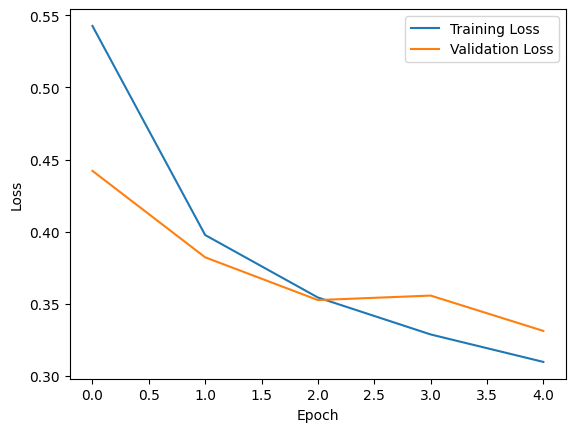

In [33]:
plt.plot(model_hist.history['loss'], label='Training Loss')
plt.plot(model_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'accuracy')

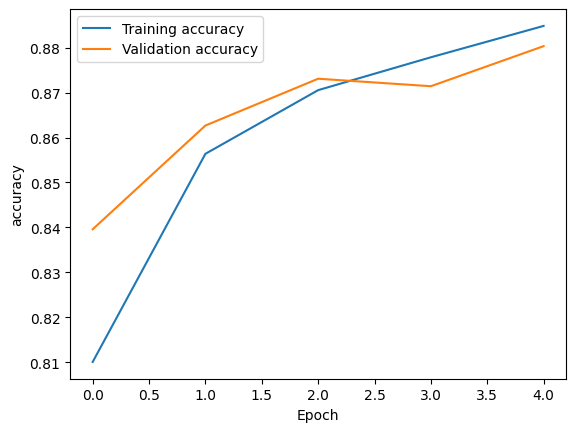

In [35]:
plt.plot(model_hist.history['accuracy'], label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('accuracy')

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 405us/step - loss: 0.3574 - accuracy: 0.8741


In [37]:
print(test_loss, test_accuracy)

0.3574085533618927 0.8741000294685364


In [38]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 0s 428us/step


array([[1.5314369e-04, 1.4459825e-07, 4.3347776e-05, ..., 2.1630475e-02,
        3.9883296e-05, 9.7327721e-01],
       [1.9533104e-04, 5.6469363e-09, 9.8887056e-01, ..., 1.3391565e-12,
        3.5356811e-07, 6.8169317e-11],
       [2.9257956e-06, 9.9998963e-01, 1.5228625e-07, ..., 7.1147034e-14,
        7.1619941e-09, 3.2850900e-13],
       ...,
       [3.2814351e-04, 8.0780502e-09, 8.5178417e-06, ..., 1.1330465e-08,
        9.9932683e-01, 3.4131493e-09],
       [2.5733516e-05, 9.9936718e-01, 4.9250698e-06, ..., 3.9418802e-09,
        2.8915838e-07, 4.8718007e-08],
       [3.7606905e-04, 1.1017879e-05, 1.7907720e-03, ..., 2.5527894e-02,
        8.4617278e-03, 3.6248006e-04]], dtype=float32)

In [39]:
predictions[0] #raw predicted output from the neurons

array([1.5314369e-04, 1.4459825e-07, 4.3347776e-05, 1.3827450e-06,
       2.2340180e-05, 4.8163394e-03, 1.5768788e-05, 2.1630475e-02,
       3.9883296e-05, 9.7327721e-01], dtype=float32)

In [40]:
#convert output into readable class
np.argmax(predictions[0])

9

In [47]:
label_comp = pd.concat([pd.Series(y_test) #actual values
                        , pd.Series(np.argmax(predictions, axis=1))] # make sure to use axis=1, otherwise argmax will apply to all the values at once
                        , axis=1)

                     

In [48]:
label_comp.rename({0:'Actual', 1:'Predicted'}, inplace=True, axis=1)
label_comp.head()

,Actual,Predicted
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [50]:
label_comp['Predicted_Clothing_Name'] = label_comp['Predicted'].map(clothing_name_list)
label_comp

,Actual,Predicted,Predicted_Clothing_Name
0,9,9,Ankle boot
1,2,2,Pullover
2,1,1,Trouser
3,1,1,Trouser
4,6,6,Shirt
...,...,...,...
9995,9,9,Ankle boot
9996,1,1,Trouser
9997,8,8,Bag
9998,1,1,Trouser


In [49]:
# predicted vs actual
misclassified_indices = np.nonzero(label_comp['Actual'] != label_comp['Predicted']) # capture the indices of all misclassified rows
misclassified_indices

(array([  17,   23,   25, ..., 9979, 9985, 9989]),)

In [53]:
# misclassification comp
print(y_test[17])
print(np.argmax(predictions[17]))

4
2


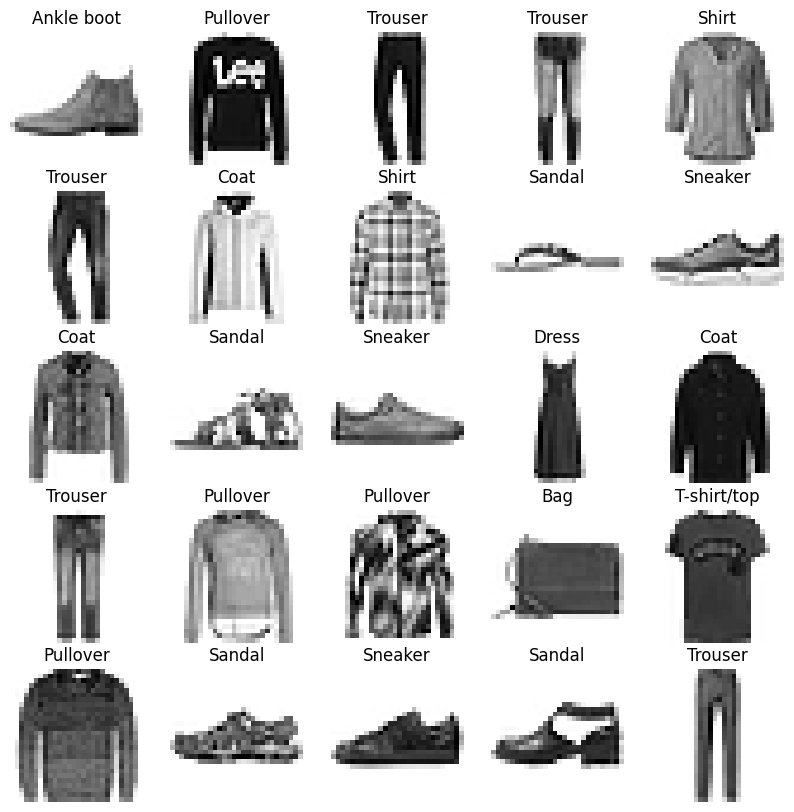

In [51]:
# let's build a 5 x 5 grid to show the images of a sample of 25 clothing items
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(-X_test[i], cmap='gray') # use - sign to invert the image
    plt.axis('off')
    plt.title(label_comp['Predicted_Clothing_Name'][i])
